# Overview

In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [239]:
df = pd.read_csv("..\data\cleaned.csv")
#drop row if pager_code == training
df = df[df.pager_code != 'Training']

# Date analysis

In [240]:
# number of callouts in a given year/quarter.
# # what is the range in dates
# print(df['date_of_shout'].min()) #01/05/2022
# print(df['date_of_shout'].max()) #31/12/2021
df['date_of_shout'] = pd.to_datetime(df['date_of_shout'], format='%d/%m/%Y')
# print(df['date_of_shout'].min()) #2021-08-04 00:00:00
# print(df['date_of_shout'].max()) #2023-09-12 00:00:00

In [241]:
# Convert to datetime
df['date_of_shout'] = pd.to_datetime(df['date_of_shout'])
df['quarter'] = df['date_of_shout'].dt.quarter
df['month'] = df['date_of_shout'].dt.month
df['year'] = df['date_of_shout'].dt.year

# Define a mapping for quarters
quarter_labels = {
    1: 'Jan-Mar',
    2: 'Apr-Jun',
    3: 'Jul-Sep',
    4: 'Oct-Dec'
}
month_labels = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

df[['date_of_shout','quarter','year','month']].head()

,date_of_shout,quarter,year,month
0,2023-07-21,3,2023,7
1,2023-07-19,3,2023,7
2,2023-07-16,3,2023,7
3,2023-07-08,3,2023,7
4,2023-07-05,3,2023,7


In [242]:
# Define function to count codes separately
def count_codes_222(series):
    return (series == 222).sum()

def count_codes_333(series):
    return (series == 333).sum()

def count_codes_999(series):
    return (series == 999).sum()

# Group by year and quarter and count codes separately
# df_grouped = df.groupby(['year', 'quarter'])
df_grouped = df.groupby(['year', 'month'])

counts_222 = df_grouped['pager_code'].apply(count_codes_222).reset_index(name='count_222')
counts_333 = df_grouped['pager_code'].apply(count_codes_333).reset_index(name='count_333')
counts_999 = df_grouped['pager_code'].apply(count_codes_999).reset_index(name='count_999')

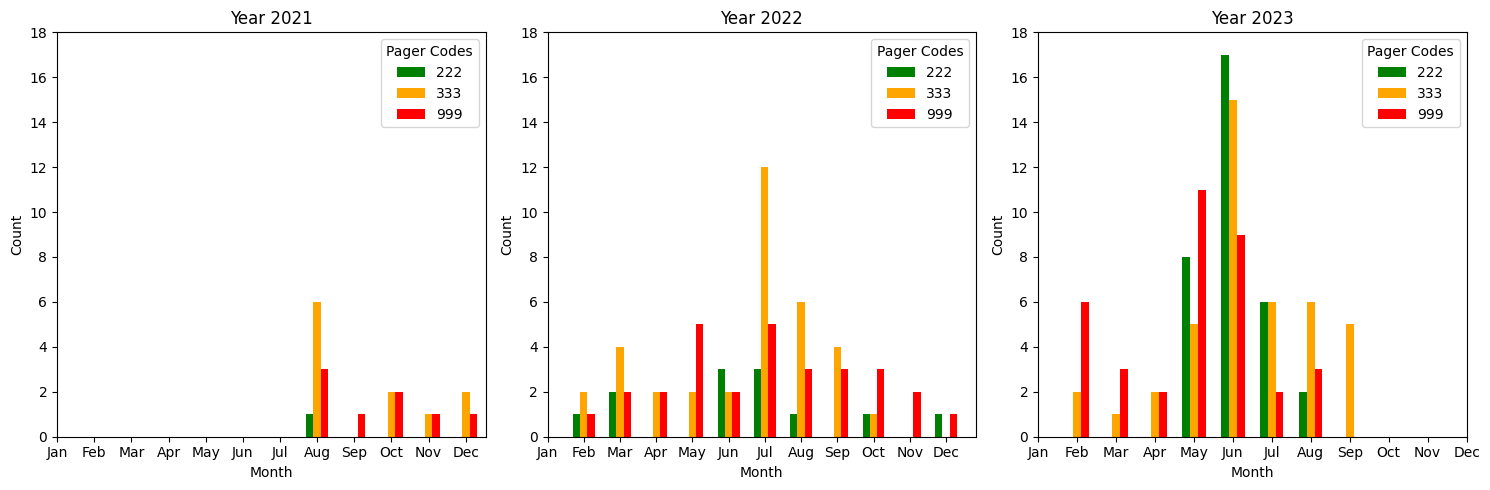

In [243]:
color_mapping = {222: 'green', 333: 'orange', 999: 'red'}

# Plotting all graphs together
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for idx, year in enumerate(counts_222['year'].unique()):
    df_year_222 = counts_222[counts_222['year'] == year]
    df_year_333 = counts_333[counts_333['year'] == year]
    df_year_999 = counts_999[counts_999['year'] == year]
    
    ax = axes[idx]
    ax.bar(df_year_222['month'] - 0.2, df_year_222['count_222'], width=0.2, color=color_mapping[222], label='222')
    ax.bar(df_year_333['month'], df_year_333['count_333'], width=0.2, color=color_mapping[333], label='333')
    ax.bar(df_year_999['month'] + 0.2, df_year_999['count_999'], width=0.2, color=color_mapping[999], label='999')
    
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.legend(title='Pager Codes')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels([month_labels[m] for m in range(1, 13)])
    ax.set_ylim(0, 18)  # Set y-axis limit from 0 to 17


plt.tight_layout()
plt.show()


## Shout tags and dates



For each month give a pie chart showing the number of for each tag 






In [244]:
# df['date_of_shout','shout_details_tags'].head()
df.columns
df['shout_details_tags'] = df['shout_details_tags'].str.split(',').apply(lambda x: tuple(x) if isinstance(x, list) else tuple())
df[['date_of_shout','shout_details_tags']].head()
shout_tags = [
    "Mechanical",
    "Rescue",
    "Medical",
    "Environmental",
    "Mishap",
    "Assistance",
    "FalseAlarm",
    "Miscellaneous",
    "Search",
    "Transport"
]

color_mapping = {
    "Mechanical": 'blue',
    "Rescue": 'green',
    "Medical": 'red',
    "Environmental": 'purple',
    "Mishap": 'orange',
    "Assistance": 'yellow',
    "FalseAlarm": 'brown',
    "Miscellaneous": 'pink',
    "Search": 'cyan',
    "Transport": 'gray'
}

df['shout_details_tags'].head()

0         (FalseAlarm,  Miscellaneous)
1    (Mechanical,  Rescue,  Transport)
2                    (Search,  Rescue)
3      (Environmental,  Miscellaneous)
4    (Mechanical,  Rescue,  Transport)
Name: shout_details_tags, dtype: object

In [245]:
def get_shout_tag_diagram(code,df):

    #only take rows with pager_code=999
    df_page = df[df['pager_code']==code]

    # a single incident may have multiple tags

    #for each row the entry at shout_details_tags look like this ('Medical', 'Rescue')

    # Expand tuples in 'shout_details_tags' to separate rows
    df_expanded_tags = df_page.explode('shout_details_tags')

    # Group by year, month, and shout tag, then count occurrences
    df_grouped_tags = df_expanded_tags.groupby(['year', 'month', 'shout_details_tags']).size().unstack(fill_value=0)

    # Plotting stacked bar graphs
    # Plotting stacked bar graphs
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)  # Share Y-axis scale

    for idx, year in enumerate(df_grouped_tags.index.get_level_values('year').unique()):
        df_year = df_grouped_tags.loc[year]

        ax = axes[idx]
        months = np.arange(1, 13)
        bottom = np.zeros(len(months))
        for tag in shout_tags:
            if tag in df_year.columns:
                # Fill missing months with zeros
                counts = df_year[tag].reindex(months, fill_value=0)
                ax.bar(months, counts, width=0.5, bottom=bottom, color=color_mapping[tag], label=tag)
                bottom += counts

        ax.set_title(f'Year {year}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Count')
        #only for the last graph put ledend
        # if idx == 2:
            # ax.legend(title='Shout Tags', bbox_to_anchor=(1, 1))
        # ax.legend(title='Shout Tags', bbox_to_anchor=(1, 1))
        #remove
        ax.set_xticks(months)
        ax.set_xticklabels([month_labels[m] for m in months])
        ax.set_ylim(0, 25)  # Set y-axis limit from 0 to 17

    # Add main title
    plt.suptitle(f'Monthly Distribution of Shout Tags for {code} incidents', fontsize=16)

    # Position legend outside the plot area
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='Shout Tags', loc='upper right', bbox_to_anchor=(1.1, 0.9))

    plt.tight_layout()
    plt.show()

In [246]:
# get_shout_tag_diagram(999,df)

# get_shout_tag_diagram(333,df)

# get_shout_tag_diagram(222,df)


# Time analysis


For each person what are their callout time distributions? (or those with a significant number of incidents atteneded).

In [247]:
feats=['time_of_shout','time_boat_launched','time_boat_returned']
# dft=df[feats]
# As a placeholder for missing values we entered "00:00" in for time features
#We replace them with NaN

# Replace "00:00" with NaN
df['time_of_shout'] = df['time_of_shout'].replace("00:00", np.nan)
df['time_boat_launched'] = df['time_boat_launched'].replace("00:00", np.nan)
df['time_boat_returned'] = df['time_boat_returned'].replace("00:00", np.nan)

# Display the DataFrame
# print(df[feats].head(88))

# Convert time columns to datetime format
df['time_of_shout'] = pd.to_datetime(df['time_of_shout'], format='%H:%M')
df['time_boat_launched'] = pd.to_datetime(df['time_boat_launched'], format='%H:%M')
df['time_boat_returned'] = pd.to_datetime(df['time_boat_returned'], format='%H:%M')

# Define a function to calculate time difference considering crossing midnight
def time_difference(start, end):
    if start <= end:
        return (end - start).total_seconds() / 60
    else:
        midnight = pd.Timestamp(end.date()) + pd.Timedelta(days=1)
        return (midnight - start).total_seconds() / 60 + (end - pd.Timestamp(end.date())).total_seconds() / 60

# Determine time between "time_of_shout" and "time_boat_launched" if values are not NaN
df['shout_launch_time'] = df.apply(
    lambda row: time_difference(row['time_of_shout'], row['time_boat_launched'])
    if pd.notnull(row['time_of_shout']) and pd.notnull(row['time_boat_launched']) else np.nan, axis=1)

# Determine time between "time_boat_launched" and "time_boat_returned" if values are not NaN
df['launch_return_time'] = df.apply(
    lambda row: time_difference(row['time_boat_launched'], row['time_boat_returned'])
    if pd.notnull(row['time_boat_launched']) and pd.notnull(row['time_boat_returned']) else np.nan, axis=1)


# Determine the shout_to_return_time if values are not NaN
df['shout_to_return_time'] = df.apply(
    lambda row: time_difference(row['time_of_shout'], row['time_boat_returned'])
    if pd.notnull(row['time_of_shout']) and pd.notnull(row['time_boat_returned']) else np.nan, axis=1)

In [248]:
feats_more=feats+["shout_launch_time",'launch_return_time','shout_to_return_time']
df['time_of_shout'] = df['time_of_shout'].dt.time
df['time_boat_launched'] = df['time_boat_launched'].dt.time
df['time_boat_returned'] = df['time_boat_returned'].dt.time
# print(df[feats_more].head(88))

In [249]:
# check if any shout_launch_time  or launch_return_time   are negative
# print(df[df['shout_launch_time'] < 0]) #none
# print(df[df['launch_return_time'] < 0])# none

#count the number of rows which have no nan in either shout_launch_time or launch_return_time
# df.shape[0]#207
# print(df.dropna(subset=[ 'launch_return_time']).shape[0]) #183
# print(df.dropna(subset=['shout_launch_time']).shape[0]) #201

#drop rows with nan in either shout_launch_time or launch_return_time
dft=df.copy()
dft = dft.dropna(subset=['shout_launch_time', 'launch_return_time','shout_to_return_time'])
# print(dft.shape[0]) #183

In [250]:
feats=['pager_code','time_of_shout','time_boat_launched','time_boat_returned',"shout_launch_time","launch_return_time","shout_to_return_time"]
dft[feats].head()

,pager_code,time_of_shout,time_boat_launched,time_boat_returned,shout_launch_time,launch_return_time,shout_to_return_time
0,999,15:05:00,15:20:00,16:15:00,15.0,55.0,70.0
1,333,18:44:00,19:00:00,20:15:00,16.0,75.0,91.0
2,999,11:10:00,11:10:00,12:15:00,0.0,65.0,65.0
3,333,09:44:00,09:55:00,10:30:00,11.0,35.0,46.0
4,222,18:49:00,19:04:00,20:04:00,15.0,60.0,75.0


Given the time differences (shout_launch_time,launch_return_time,shout_to_return_time) we provide a boxplot for the pager_code 222,333,999. First we note we have outliers in these measurements.

In [251]:
dftpager_outliers = dft[(dft['shout_launch_time'] > 60) | 
                        (dft['launch_return_time'] > 400) | 
                        (dft['shout_to_return_time'] > 300)]
# dftpager_outliers.shape[0] #8

In [252]:
x=dftpager_outliers[['time_of_shout','time_boat_launched','time_boat_returned']+feats+["shout_details"]]
print(x.to_string(index=False))  # print full line


time_of_shout time_boat_launched time_boat_returned  pager_code time_of_shout time_boat_launched time_boat_returned  shout_launch_time  launch_return_time  shout_to_return_time                                                                                                                                                                                                                                                   shout_details
     19:15:00           19:08:00           21:15:00         222      19:15:00           19:08:00           21:15:00             1433.0               127.0                 120.0                                             Crew were out on training when flagged down by a member of the public to a bROken down ski south of duck bay marina with 1 person on board. Crew then secured the Jetski and towed it back to Duncan mills slipway.
     12:02:00           10:30:00           13:35:00         999      12:02:00           10:30:00           13:35:00             1348.0

We have outliers because the crew recorded a train exercise and an incident at the same time. It would have been better to note when the training finished or the incident started and log these as two separate events. Additionally the time of launch is before the time of shout - similary for the other outliers. We are working under the assumption that the time of shout precedes the time of boat launch. We now look at the boxplots for the time differences for the pager codes 222,333,999.

In [253]:
# Filter out outliers
dftpager = dft[(dft['shout_launch_time'] <= 60) & 
               (dft['launch_return_time'] <= 400) & 
               (dft['shout_to_return_time'] <= 300)]

# Melt the DataFrame to long format for boxplot
dftpager = dftpager.melt(id_vars='pager_code', var_name='feature', value_name='time')

# Select the features to plot
# feats = ['pager_code', 'shout_launch_time', 'launch_return_time', 'shout_to_return_time']

In [254]:
color_mapping={222:'green',333:'orange',999:'red'}

In [255]:
def boxplot_time_pager(feat,title):

# Iterate over each feature and create a separate boxplot

    plt.figure(figsize=(8, 6))
    
    # Filter the DataFrame for the current feature
    filtered_data = dftpager[dftpager['feature'] == feat]
    
    # Extract unique pager codes and assign colors based on the mapping
    unique_pager_code = filtered_data['pager_code'].unique()
    colors = [color_mapping.get(code, 'blue') for code in unique_pager_code]
    
    # Boxplot with custom colors
    sns.boxplot(x='pager_code', y='time', hue='pager_code', data=filtered_data, palette=color_mapping, dodge=False)

    # Hide the legend
    plt.legend([],[], frameon=False)    
    
    # Extract the mean for each pager_code
    mean_values = filtered_data.groupby('pager_code')['time'].mean()
    
    # Annotate boxplot with mean values
    for i, mean in enumerate(mean_values):
        plt.text(i, mean, f'{round(mean)}', ha='center', va='bottom', color='black', fontsize=10)
    
    plt.xlabel('Pager Code')
    plt.ylabel('Time (minutes)')
    plt.title(title)
    plt.show()

# feats = ['shout_launch_time', 'launch_return_time', 'shout_to_return_time']
# boxplot_time_pager(feats[0],title='Distribution of Shout to Launch Time')
# boxplot_time_pager(feats[1],title='Distribution of Launch to Return Time')
# boxplot_time_pager(feats[2],title='Distribution of Shout to Return Time')


## Scatterplot times and length with pager code coloring 

Get scatter plot for time incident occures (x) and length of time y 

In [261]:
# dft[['time_of_shout','shout_to_return_time']].head()
dft['time_of_shout_float'] = dft['time_of_shout'].apply(lambda x: x.hour + x.minute / 60.0)

dft[feats+['time_of_shout_float']].head()

,pager_code,time_of_shout,time_boat_launched,time_boat_returned,shout_launch_time,launch_return_time,shout_to_return_time,time_of_shout_float
0,999,15:05:00,15:20:00,16:15:00,15.0,55.0,70.0,15.083333
1,333,18:44:00,19:00:00,20:15:00,16.0,75.0,91.0,18.733333
2,999,11:10:00,11:10:00,12:15:00,0.0,65.0,65.0,11.166667
3,333,09:44:00,09:55:00,10:30:00,11.0,35.0,46.0,9.733333
4,222,18:49:00,19:04:00,20:04:00,15.0,60.0,75.0,18.816667


In [262]:
#remove outliers.
# remove the highest shout_to_return_time with 222 pager code
dft=dft[(dft['shout_to_return_time'] <1000)]
dft.shape[0]

182

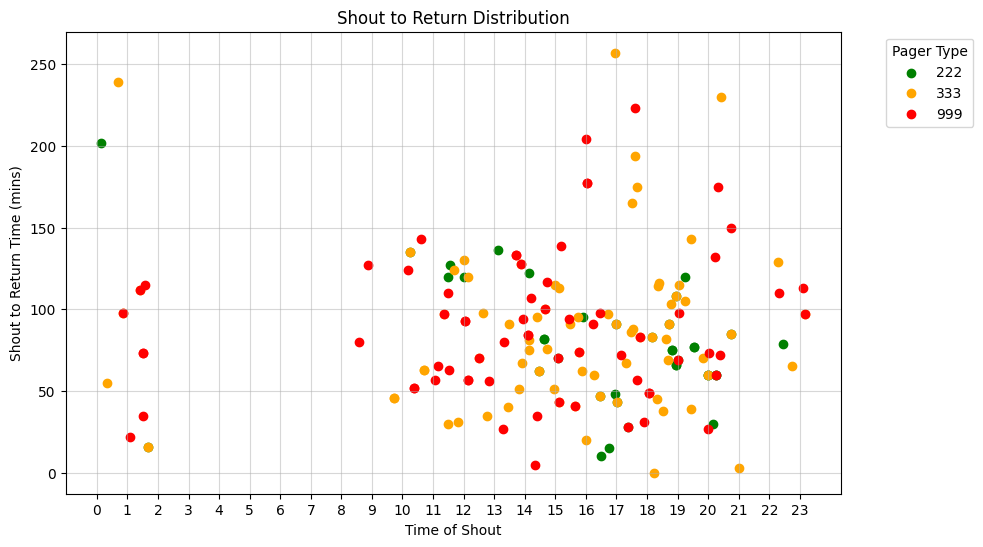

In [263]:
# Assuming 'shout_to_return_time' is in datetime format but without a date component
# dft['shout_to_return_time'] = dft['shout_to_return_time'].apply(lambda x: pd.Timestamp.combine(pd.Timestamp.min.date(), x))

# Extract hour and minute components of time_of_shout and represent as float
dft['time_of_shout_float'] = dft['time_of_shout'].apply(lambda x: x.hour + x.minute / 60.0)

# Plot scatter plot
plt.figure(figsize=(10, 6))

for pager_type, color in color_mapping.items():
    mask = dft['pager_code'] == pager_type
    plt.scatter(dft.loc[mask, 'time_of_shout_float'], dft.loc[mask, 'shout_to_return_time'], color=color, label=f'{pager_type}')

plt.xlabel('Time of Shout')
plt.ylabel('Shout to Return Time (mins)')
plt.title('Shout to Return Distribution')

# Decompose the x-axis into integers
plt.xticks(range(int(dft['time_of_shout_float'].max()) + 1))

# Move the legend outside of the diagram
plt.legend(title='Pager Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True,alpha=0.5)
plt.show()



# Boxplots person time of shout (what time do they usually attend).

For each person in crew if person in crew_on_board for entry get time_of_shout. Record these and create a boxplot for these times.


In [264]:
# dft.shape[0]

crew={
    "RB": "Ronnie Britton",
    "RO": "Rennie Oliver",
    "IG": "Iain Gollan (Goz)",
    "AM": "Ally McLeod",
    "ABS": "Andy Biddulph Snr",
    "ABJ": "Andy Biddulph Jnr",
    "GD": "Gemma Dorran",
    "PBT": "Phils Brooks-Taylor",
    "DON": "David O'Neil",
    "CC": "Craig Clancy",
    "GH": "Gerry Heaney",
    "AJM": "Angus John MacDonald",
    "CMS": "Callum MacKenzie Stevens",
    "DS": "David Stuart",
    "TR": "Thomas Rogers",
    "EM": "Euan MciIwraith",
    "PD": "Paul Dorrian",
    "KM": "Kevin McPartland",
    "JB": "Jenna Biddulph",
    "VM": "Vicki Murphy",
    "JM": "John Mason",
    "AC": "Andy Connell",
    "FN": "Franny Nicol",
    "FR": "Frank Rogers",
    "CA": "Christine Allan",
    "CS": "Clinton Salter",
    "JT": "James Thomson",
    "TAM":"Tam (Cox)",
    "GERARD":"Gerard",
    "DAVY":"Davy",
    "LEE":"Lee",
}
crew_keys=list(crew.keys())

# I want to inspect
# df['crew_on_board']

#I want to turn each entry in this col into a tuple
df['crew_on_board'] = df['crew_on_board'].str.split(',').apply(lambda x: tuple(x) if isinstance(x, list) else tuple())
# df['crew_on_board']
df['crew_on_shore'] = df['crew_on_shore'].str.split(',').apply(lambda x: tuple(x) if isinstance(x, list) else tuple())


In [265]:
df['time_of_shout_float'] = df['time_of_shout'].apply(lambda x: x.hour + x.minute / 60.0)

,crew_on_board,crew_on_shore,time_of_shout,time_of_shout_float
0,"(RB, TR, AM, CS)","(GH, DON)",15:05:00,15.083333
1,"(RB, CG, TR, ABJ, AM)","(RO, ABS)",18:44:00,18.733333
2,"(RB, RO, GH)",(),11:10:00,11.166667
3,"(DS, AM, AJM)","(TR, DO)",09:44:00,9.733333
4,"(ABS, EM, JB, CG)","(RB, AM)",18:49:00,18.816667


In [267]:
feats=['crew_on_board','crew_on_shore','time_of_shout','time_of_shout_float']
df[feats].head()

,crew_on_board,crew_on_shore,time_of_shout,time_of_shout_float
0,"(RB, TR, AM, CS)","(GH, DON)",15:05:00,15.083333
1,"(RB, CG, TR, ABJ, AM)","(RO, ABS)",18:44:00,18.733333
2,"(RB, RO, GH)",(),11:10:00,11.166667
3,"(DS, AM, AJM)","(TR, DO)",09:44:00,9.733333
4,"(ABS, EM, JB, CG)","(RB, AM)",18:49:00,18.816667


In [302]:
def box_crew_times(position,df,crew_keys,title):

    # Explode the DataFrame to separate rows for each crew member on board
    df_expanded_crew_board = df.explode(position)
    # df_expanded_crew_board[['crew_on_board','time_of_shout_float']].head()


    # Create an empty dictionary to store time of shout floats for each crew member
    data_dict = {}

    # Iterate over each crew member
    for person in crew_keys:
        # Get time of shout floats for the current crew member
        time_of_shout_floats = df_expanded_crew_board.loc[df_expanded_crew_board[position] == person, 'time_of_shout_float'].tolist()
        # print(person,len(time_of_shout_floats))
        if len(time_of_shout_floats)<5:
            continue
        # Store time of shout floats in the dictionary with crew member as key
        data_dict[crew[person]] = time_of_shout_floats

    # Plot boxplots for time of shout for each crew member
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=list(data_dict.values()), palette='viridis')
    plt.xticks(ticks=range(len(data_dict)), labels=data_dict.keys(), rotation=45)  # Use crew_keys for x-axis labels
    plt.xlabel('Crew Members')
    plt.ylabel('Time of Shout')
    plt.title(title)
    plt.grid(True, alpha=0.5)
    plt.show()

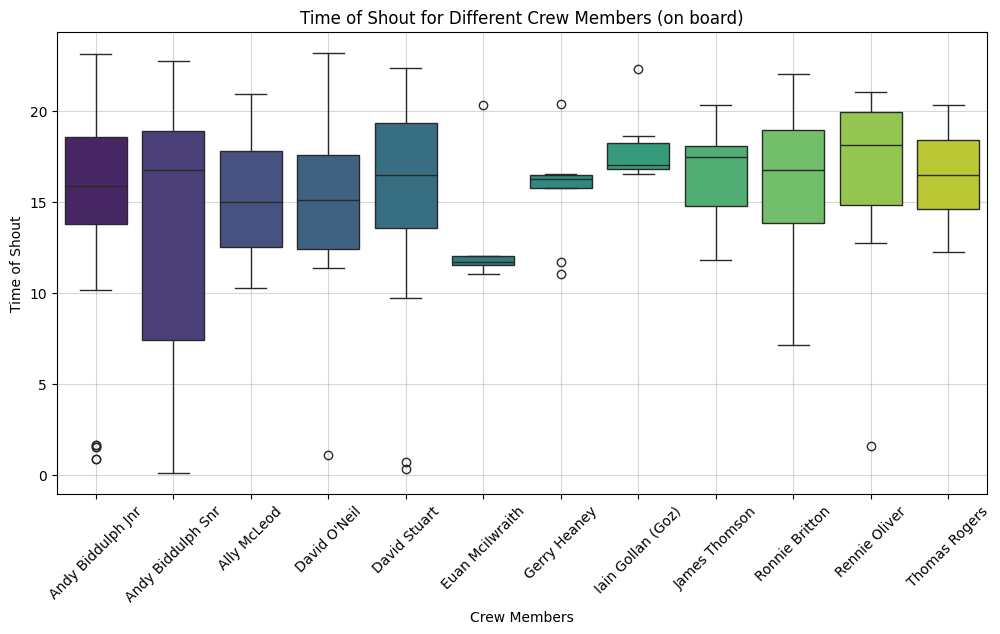

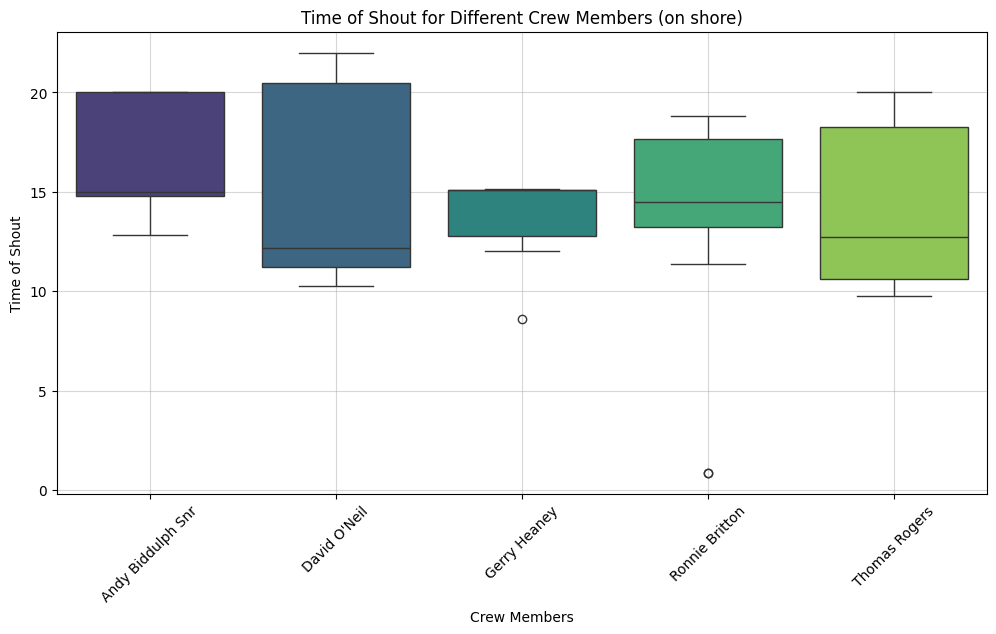

In [303]:
box_crew_times('crew_on_board',df,crew_keys,title='Time of Shout for Different Crew Members (on board)')

box_crew_times('crew_on_shore',df,crew_keys,title='Time of Shout for Different Crew Members (on shore)')

## Shout tags and time taken.



For each tag get the shout-return time take and box plot.

In [197]:
feats=['shout_details_tags',"shout_to_return_time"]
dft[feats].head()

,shout_details_tags,shout_to_return_time
0,"(FalseAlarm, Miscellaneous)",70.0
1,"(Mechanical, Rescue, Transport)",91.0
2,"(Search, Rescue)",65.0
3,"(Environmental, Miscellaneous)",46.0
4,"(Mechanical, Rescue, Transport)",75.0


In [205]:
df_expanded_tags = dft.explode('shout_details_tags')
df_expanded_tags[feats].head()

tag_colors = {
    "Mechanical": 'blue',
    "Rescue": 'green',
    "Medical": 'red',
    "Environmental": 'purple',
    "Mishap": 'orange',
    "Assistance": 'yellow',
    "FalseAlarm": 'brown',
    "Miscellaneous": 'pink',
    "Search": 'cyan',
    "Transport": 'gray'
}


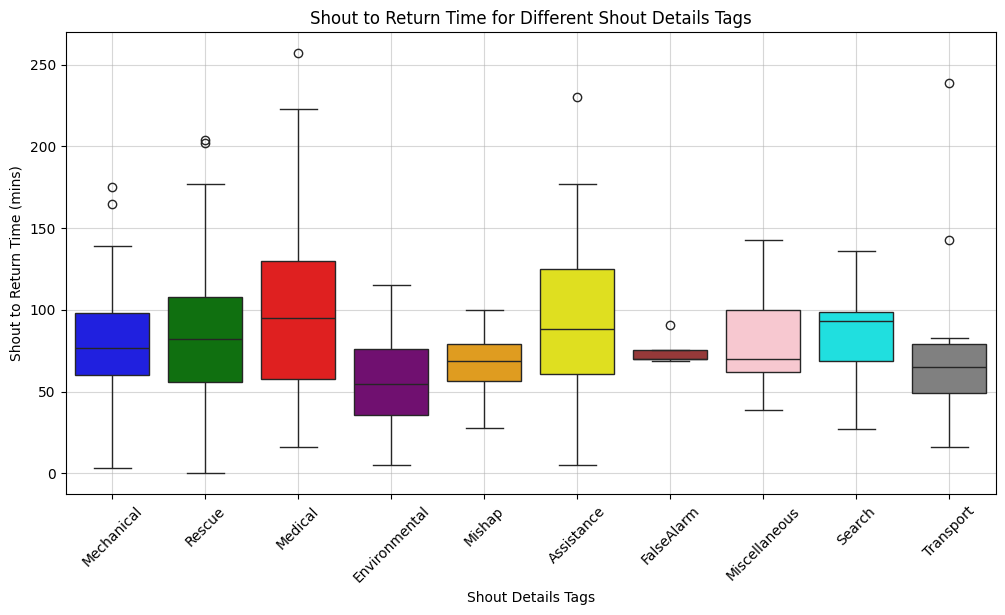

In [211]:
#for each label in tag_color.keys() get the shout_to_return_time and create a dictionary like
# 
# {'Mechanical':[[85.0, 49.0, 122.0, 107.0, 35.0, 143.0, 27.0],"Rescue":[...]} 

# Create a dictionary to hold the shout_to_return_time for each label
data_dict = {}

# Iterate over each label in tag_colors.keys()
for label in tag_colors.keys():
    # Filter the DataFrame for the current label and extract shout_to_return_time as a list
    data_dict[label] = df_expanded_tags[df_expanded_tags['shout_details_tags'] == label]['shout_to_return_time'].tolist()


# Plot boxplot for each shout_details_tags
plt.figure(figsize=(12, 6))
sns.boxplot(data=list(data_dict.values()), palette=tag_colors.values())
plt.xticks(ticks=range(len(data_dict)), labels=data_dict.keys(), rotation=45)
plt.xlabel('Shout Detail Tags')
plt.ylabel('Shout to Return Time (mins)')
plt.title('Shout to Return Time for Different Shout Details Tags')
plt.grid(True, alpha=0.5)
plt.show()

# Crew analysis

Between 01/05/2022 and 31/12/2021 how many incidents have each crew memember attended and how are these incidents decomposed by pager code? We will view this as a stacked bar grap.



In [299]:
#I want to turn each entry in this col into a tuple
df['crew_on_board'] = df['crew_on_board'].str.split(',').apply(lambda x: tuple(x) if isinstance(x, list) else tuple())
# df['crew_on_board']
df['crew_on_shore'] = df['crew_on_shore'].str.split(',').apply(lambda x: tuple(x) if isinstance(x, list) else tuple())
df['crew_on_shore'] 

In [249]:
def get_dictionaries(place,splitter=5):

    #count the number of incidents a given initial has atteneded (sum all the incidents they have atteneded)
    dict_board_crew = {}
    for crew_person in crew_keys:
        counter=0
        dict_board_crew[crew_person] = df[df[place].apply(lambda x: crew_person in x)].shape[0]
    # dict_board_crew

    #and record the initials of those with 0 incidents
    crew_no_incidents = [key for key in dict_board_crew.keys() if dict_board_crew[key] == 0]
    # crew_no_incidents #['GD', 'CC','JB','VM','JM','AC','FN','CA', 'TAM', 'GERARD','DAVY','LEE']
    print(crew_no_incidents)

    # remove those with 0 incidents from dict_crew
    dict_board_crew = {key: value for key, value in dict_board_crew.items() if value != 0}
    # crew_no_incidents

    # The total crew can be partitioned into those with more that (splitter) incidents and those with less than 6 incidents
    #get the crew that have been on less than (incidents and create dict_crew_reg and dict_crew_occasional
    dict_crew_reg = {}
    dict_crew_occasional = {}
    for key, value in dict_board_crew.items():
        if value <= splitter:
            dict_crew_occasional[key] = value
        else:
            dict_crew_reg[key] = value

    return dict_crew_reg,dict_crew_occasional

In [281]:
dict_crew_board_reg,dict_crew_board_occasional=get_dictionaries(place='crew_on_board',splitter=6)

#set splitter to...
dict_crew_shore_reg,dict_crew_shore_occasional=get_dictionaries(place='crew_on_shore',splitter=3)

['GD', 'CC', 'JB', 'VM', 'JM', 'AC', 'FN', 'CA', 'TAM', 'GERARD', 'DAVY', 'LEE']
['IG', 'AJM', 'CMS', 'EM', 'KM', 'VM', 'JM', 'AC', 'FN', 'FR', 'CA', 'CS', 'JT', 'TAM', 'GERARD', 'DAVY', 'LEE']


For each of these groups we decompose the total number of incidents by pager codes.

In [282]:
def counter(given_initials, data,place):    
    dict_counts = {999:0, 333:0, 222:0}
    for entry in data.to_dict(orient='records'):
        tup = entry[place]
        if given_initials in tup:
            dict_counts[entry['pager_code']] = dict_counts.get(entry['pager_code'], 0) + 1
    return dict_counts

def get_pager_counts(dict_crew_reg,dict_crew_occasional,place):

    dict_crew_reg_pager = {}
    for crew_person in dict_crew_reg:
        feats=['pager_code',place]
        dict_crew_reg_pager[crew_person] = counter(crew_person, df[feats],place)
    # dict_crew_reg_pager

    dict_crew_occasional_pager = {}
    for crew_person in dict_crew_occasional:
        dict_crew_occasional_pager[crew_person] = counter(crew_person, df[feats],place)
    # dict_crew_board_occasional_pager

    return dict_crew_reg_pager,dict_crew_occasional_pager



In [283]:
dict_crew_board_reg_pager,dict_crew_board_occasional_pager=get_pager_counts(dict_crew_board_reg,dict_crew_board_occasional,place='crew_on_board')

dict_crew_shore_reg_pager,dict_crew_shore_occasional_pager=get_pager_counts(dict_crew_shore_reg,dict_crew_shore_occasional,place='crew_on_shore')
# dict_crew_shore_reg_pager

In [286]:

def stacked_bar(dict_crew_pager, color_mapping, coxswains, safety_advisors,title):

    counts = dict_crew_pager
    initials = list(dict_crew_pager.keys()) 

    # Calculate the total count for each initial
    total_counts = {initial: sum(counts[initial].values()) for initial in initials}

    # Sort initials based on total count in descending order
    sorted_initials = sorted(initials, key=lambda x: total_counts[x], reverse=True)

    # Plotting the stacked bar graph
    fig, ax = plt.subplots()

    # Position for each bar
    positions = list(range(len(sorted_initials)))

    # Plotting each pager code for each initials as a stacked bar
    bottom = None
    for i, code in enumerate([999, 333, 222]):
        values = [counts[initial][code] for initial in sorted_initials]
        if bottom is None:
            ax.bar(positions, values, label=f'{code}', color=[color_mapping[code] for _ in sorted_initials])
            bottom = values
        else:
            ax.bar(positions, values, label=f'{code}', bottom=bottom, color=[color_mapping[code] for _ in sorted_initials])
            bottom = [bottom[j] + values[j] for j in range(len(bottom))]

    
    # Set y-scale to 45
    plt.ylim(0, 45)
    # Adding labels and title
    ax.set_xlabel('Crew Initials')
    ax.set_ylabel('# Incidents')
    ax.set_title(title)

    ax.set_xticks(positions)

    # Modify x-axis tick labels to highlight coxswains and place "*+" under both coxswains and safety advisors
    tick_labels = []
    for initial in sorted_initials:
        label = ""
        if initial in coxswains and initial in safety_advisors:
            label += "*+"
        elif initial in coxswains:
            label += "*"
        elif initial in safety_advisors:
            label += "+"
        tick_labels.append(initial + label)
        
    ax.set_xticklabels(tick_labels, fontsize='small')  # Increase the font size here

    # Creating a custom legend
    legend_labels = ['222', '333', '999', 'Coxswains', 'Safety Advisors']
    legend_handles = []
    for code in [222, 333, 999]:
        legend_handles.append(ax.bar(0, 0, color=color_mapping[code])[0])

    ax.legend(legend_handles, legend_labels, loc='upper right')

    # Displaying the plot
    plt.show()



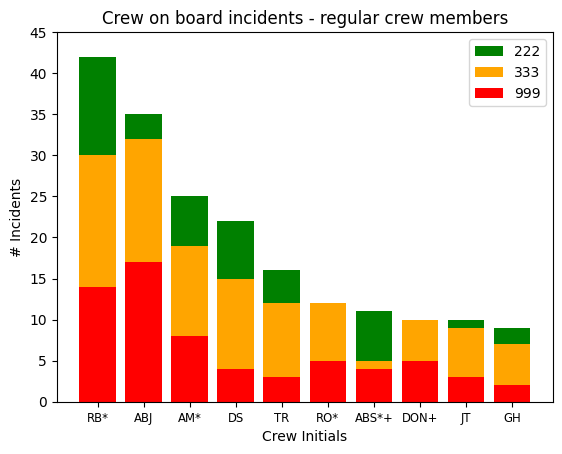

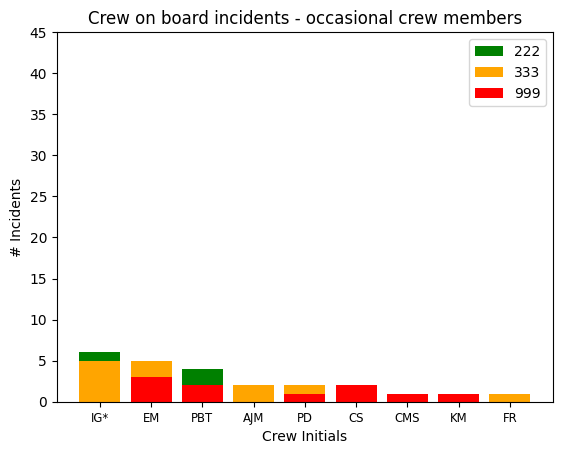

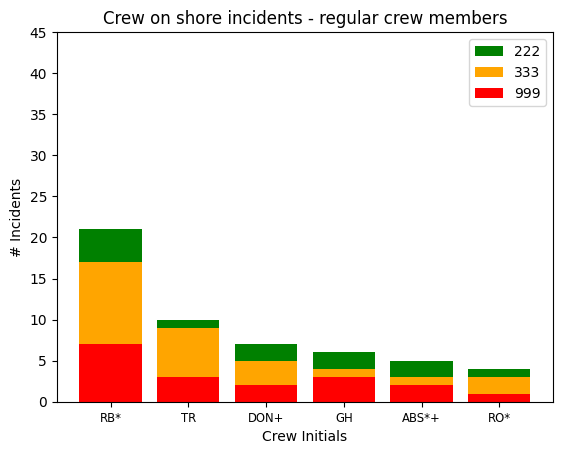

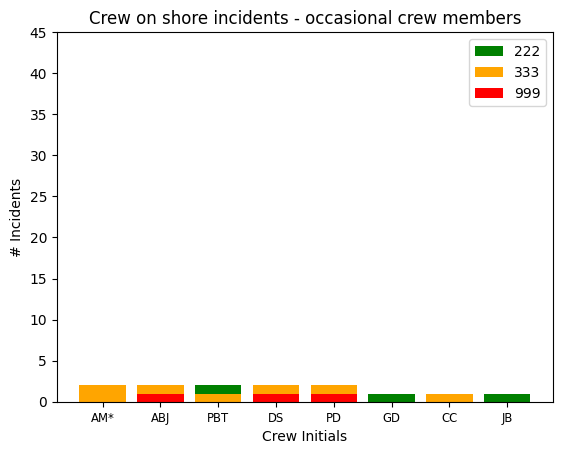

In [115]:
# #We note the coxswains with * and Safety Advisors with +
coxswains=["RB","RO","IG","AM","ABS"]
safety_advisors=["ABS","DON"]

stacked_bar(dict_crew_board_reg_pager,color_mapping,coxswains,safety_advisors,title="Crew on board incidents - regular crew members")

stacked_bar(dict_crew_board_occasional_pager,color_mapping,coxswains,safety_advisors,title="Crew on board incidents - occasional crew members")

stacked_bar(dict_crew_shore_reg_pager,color_mapping,coxswains,safety_advisors,title="Crew on shore incidents - regular crew members")

stacked_bar(dict_crew_shore_occasional_pager,color_mapping,coxswains,safety_advisors,title="Crew on shore incidents - occasional crew members")